In [1]:
#The store wants to know better the customer purchase behaviour against different products on Black Friday.
#Here I am trying to predicts the amount of money person is like to spend on Black Friday.
#Based on Gender,Age,occupation,city and other independent varibales.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pwd

'C:\\Users\\91909\\Desktop\\DS'

In [4]:
data=pd.read_csv('BlackFriday.csv')

In [5]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
data.isnull().sum()#To check null values

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

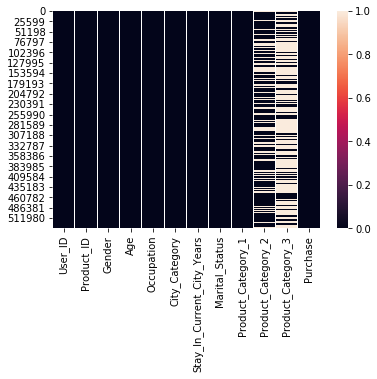

In [8]:
sns.heatmap(data.isnull())#To check null values

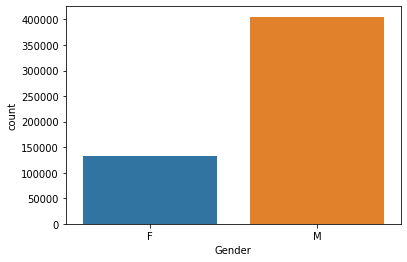

In [9]:
sns.countplot(x='Gender',data=data)#here Male visited and purchaed more products than female

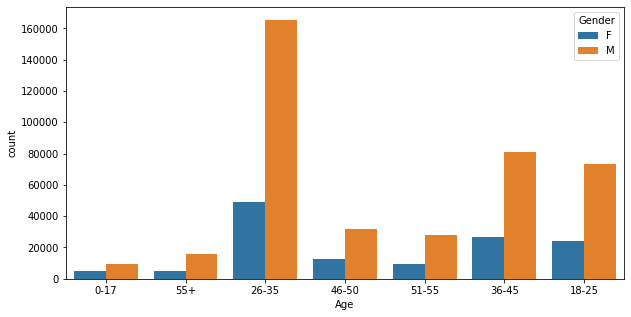

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age',hue='Gender',data=data)#1.Male and Female have age between 26-35 purchase more product 2.Male age=36-45 

In [11]:
data['Occupation'].unique()#Below are unique occupation

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [12]:
data['Occupation'].nunique()#Total 21 occupation are available in dataset

21

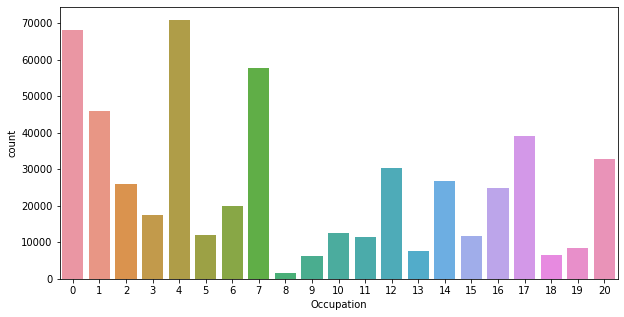

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='Occupation',data=data)#The occupation id 4 people have more count


In [14]:
a=data.groupby('Occupation')['Purchase'].sum()#Here got product purchased based on Occupation with their amount

In [15]:
a

Occupation
0     625814811
1     414552829
2     233275393
3     160428450
4     657530393
5     112525355
6     185065697
7     549282744
8      14594599
9      53619309
10    114273954
11    105437359
12    300672105
13     71135744
14    255594745
15    116540026
16    234442330
17    387240355
18     60249706
19     73115489
20    292276985
Name: Purchase, dtype: int64

In [16]:
a.max()#Max amount spend by occupation group

657530393

In [17]:
a.argmax()# and the occupation 4 spend more money in black friday

4

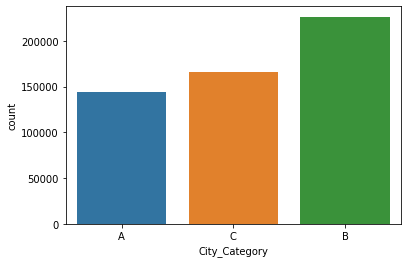

In [18]:
sns.countplot(x='City_Category',data=data)#Here I conclude that city category B visited more in black friday.

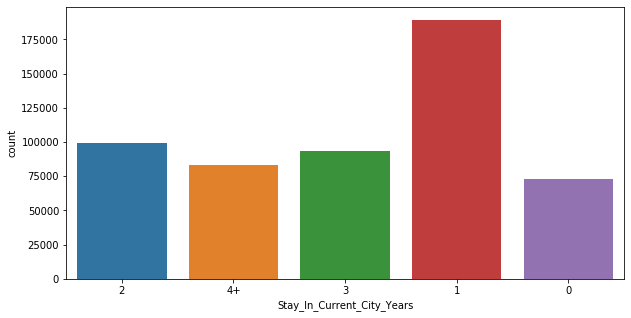

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='Stay_In_Current_City_Years',data=data)#The people who are living since 1 year visited more

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [21]:
data=data.drop(['User_ID','Product_ID','Product_Category_3'],axis=1)#I think we do not need these three columns

In [22]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,NaN,7969


In [23]:
#Convert Gender,age, city in int by using get_dummies

In [24]:
gender=pd.get_dummies(data['Gender'],drop_first=True)

In [25]:
gender.head()

,M
0,0
1,0
2,0
3,0
4,1


In [26]:
age=pd.get_dummies(data['Age'])

In [27]:
age.head()

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1


In [28]:
city=pd.get_dummies(data['City_Category'],drop_first=True)

In [29]:
city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [30]:
data=data.drop(['Gender','Age','City_Category'],axis=1)

In [31]:
data.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,10,2,0,3,NaN,8370
1,10,2,0,1,6.0,15200
2,10,2,0,12,NaN,1422
3,10,2,0,12,14.0,1057
4,16,4+,0,8,NaN,7969


In [32]:
x=pd.concat([data,gender,age,city],axis=1)

In [33]:
x.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,M,0-17,18-25,26-35,36-45,46-50,51-55,55+,B,C
0,10,2,0,3,NaN,8370,0,1,0,0,0,0,0,0,0,0
1,10,2,0,1,6.0,15200,0,1,0,0,0,0,0,0,0,0
2,10,2,0,12,NaN,1422,0,1,0,0,0,0,0,0,0,0
3,10,2,0,12,14.0,1057,0,1,0,0,0,0,0,0,0,0
4,16,4+,0,8,NaN,7969,1,0,0,0,0,0,0,1,0,1


In [34]:
x.drop(['Purchase'],axis=1,inplace=True)

In [35]:
x.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,M,0-17,18-25,26-35,36-45,46-50,51-55,55+,B,C
0,10,2,0,3,NaN,0,1,0,0,0,0,0,0,0,0
1,10,2,0,1,6.0,0,1,0,0,0,0,0,0,0,0
2,10,2,0,12,NaN,0,1,0,0,0,0,0,0,0,0
3,10,2,0,12,14.0,0,1,0,0,0,0,0,0,0,0
4,16,4+,0,8,NaN,1,0,0,0,0,0,0,1,0,1


In [36]:
staycity=pd.get_dummies(data['Stay_In_Current_City_Years'],drop_first=True)# 

In [37]:
staycity.head()

,1,2,3,4+
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1


In [38]:
x.drop(['Stay_In_Current_City_Years'],axis=1,inplace=True)

In [39]:
x=pd.concat([x,staycity],axis=1)

In [40]:
x['Product_Category_2'].fillna((x['Product_Category_2'].mean()), inplace=True)# If not remove Nan Value it will give an error

In [41]:
x

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,M,0-17,18-25,26-35,36-45,46-50,51-55,55+,B,C,1,2,3,4+
0,10,0,3,9.842144,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,10,0,1,6.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,10,0,12,9.842144,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,10,0,12,14.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,16,0,8,9.842144,1,0,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,16,0,1,2.000000,1,0,0,0,1,0,0,0,0,1,1,0,0,0
537573,16,0,1,15.000000,1,0,0,0,1,0,0,0,0,1,1,0,0,0
537574,16,0,8,15.000000,1,0,0,0,1,0,0,0,0,1,1,0,0,0
537575,16,0,5,9.842144,1,0,0,0,1,0,0,0,0,1,1,0,0,0


In [42]:
y=data['Purchase']

In [43]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [44]:
#Train model 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)#Split model

In [47]:
#x_train
#x_test
#y_train
#y_test

In [48]:
l_model = LinearRegression()
l_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
coff=pd.DataFrame(l_model.coef_,x.columns,columns=['cofficient'])
print(coff)

                    cofficient
Occupation            5.716371
Marital_Status      -60.331434
Product_Category_1 -379.039389
Product_Category_2  -82.876378
M                   504.456335
0-17               -566.876920
18-25              -223.839101
26-35               -24.370533
36-45               115.917308
46-50                53.273577
51-55               409.807107
55+                 236.088563
B                   176.688409
C                   760.134774
1                    18.985015
2                    63.142765
3                    11.986191
4+                   30.878143


In [50]:
prediction=l_model.predict(x_test)

In [51]:
prediction

array([ 7560.50138002, 11112.93547115, 10258.96386754, ...,
        8798.59299319,  9016.72563007, 11844.98548012])

In [52]:
from sklearn import metrics #Evaluate model performance

In [53]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))#Evaluted for test data
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 3612.2694963233034
MSE: 22075938.81251082
RMSE: 4698.503890868967


In [60]:
t_pre=l_model.predict(x_train)

In [63]:
print('MAE:',metrics.mean_absolute_error(y_train,t_pre))#Evaluated for train data and there is less difference it means our model is perfect
print('MSE:',metrics.mean_squared_error(y_train,t_pre))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, t_pre)))

MAE: 3611.969604251414
MSE: 22078830.256314903
RMSE: 4698.811579145828
